**DATA LOADING AND CLEANING**

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('nigeria_startup_funding.csv')
print(df.head(7))
print(df.info())
print(df.describe())
df.shape

       Startup    Industry  Funding Amount (USD) Funding Round Location  Year
0     Paystack     Fintech               8500000      Series A    Lagos  2018
1  Flutterwave     Fintech              10000000      Series A    Lagos  2019
2         Kuda     Fintech              25000000      Series B    Lagos  2020
3       54gene  HealthTech              15000000      Series A    Abuja  2020
4       Andela      EdTech             100000000      Series D    Lagos  2019
5    Jobberman      HRTech               5000000          Seed    Lagos  2018
6    PiggyVest     Fintech               1000000          Seed    Lagos  2019
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Startup               18 non-null     object
 1   Industry              18 non-null     object
 2   Funding Amount (USD)  18 non-null     int64 
 3   Funding Round      

(18, 6)

In [42]:
df["Funding Amount(USD(,))"] = df['Funding Amount (USD)'].apply(lambda x: f"{x:,}")
cleaned = df[["Startup", "Industry", 'Funding Amount(USD(,))', "Funding Round", "Location", "Year"]]
cleaned.to_csv("cleaned nigeria_startup_funding.csv", index=False)
new = pd.read_csv("cleaned nigeria_startup_funding.csv")
print(new.head(7))

       Startup    Industry Funding Amount(USD(,)) Funding Round Location  Year
0     Paystack     Fintech              8,500,000      Series A    Lagos  2018
1  Flutterwave     Fintech             10,000,000      Series A    Lagos  2019
2         Kuda     Fintech             25,000,000      Series B    Lagos  2020
3       54gene  HealthTech             15,000,000      Series A    Abuja  2020
4       Andela      EdTech            100,000,000      Series D    Lagos  2019
5    Jobberman      HRTech              5,000,000          Seed    Lagos  2018
6    PiggyVest     Fintech              1,000,000          Seed    Lagos  2019


**EXPLORATORY DATA ANALYSIS**

How many startup got funded each year?

In [43]:
each_year_startup = new.groupby('Year')['Startup'].count()
print(each_year_startup) 

Year
2018    2
2019    3
2020    3
2021    4
2022    3
2023    3
Name: Startup, dtype: int64


what are the top 5 startups with the highest funding?

In [44]:
new.sort_values(by="Funding Amount(USD(,))", ascending=False).head(5)

,Startup,Industry,"Funding Amount(USD(,))",Funding Round,Location,Year
0,Paystack,Fintech,"8,500,000",Series A,Lagos,2018
13,Vesti,Fintech,"500,000",Pre-Seed,Lagos,2022
5,Jobberman,HRTech,"5,000,000",Seed,Lagos,2018
15,Nomba,Fintech,"30,000,000",Series A,Lagos,2023
7,Cowrywise,Fintech,"3,000,000",Pre-Series A,Lagos,2021


which industry has received the most funding overall?

In [62]:
Each_Indus_Fund = df.groupby('Industry')['Funding Amount (USD)'].sum()
print(Each_Indus_Fund) 

Industry
EdTech        101000000
Fintech        81500000
HRTech          5000000
HealthTech     26500000
PropTech        2600000
Tech            1500000
Transport       1500000
Name: Funding Amount (USD), dtype: int64


In [75]:
highest_fund = Each_Indus_Fund.max() 
industry = Each_Indus_Fund.idxmax()
print(f"{industry} with a total of, {highest_fund}")

EdTech with a total of, 101000000


which city has highest startup funding?

In [85]:
each_city_fund = df.groupby('Location')['Funding Amount (USD)'].sum()
highest_num_fund = each_city_fund.max()
location = each_city_fund.idxmax()
print(f"{location}, with {highest_num_fund} startup fundings")

Lagos, with 204600000 startup fundings


how much funding has each Funding Round received in total?

In [68]:
each_fund_round = df.groupby('Funding Round')['Funding Amount (USD)'].sum()
print(each_fund_round)

Funding Round
Pre-Seed          1500000
Pre-Series A      3000000
Seed             16600000
Series A         73500000
Series B         25000000
Series D        100000000
Name: Funding Amount (USD), dtype: int64


which year had the highest number of funded startups?

In [93]:
highest_num_startups = each_year_startup.max()
year = each_year_startup.idxmax()
print(f"{year}, with {highest_num_startups} startups")

2021, with 4 startups


what the average funding amount by industry?

In [98]:
average_fund_Indus = df.groupby('Industry')['Funding Amount (USD)'].mean())
print(average_fund_Indus)

Industry
EdTech        5.050000e+07
Fintech       9.055556e+06
HRTech        5.000000e+06
HealthTech    8.833333e+06
PropTech      2.600000e+06
Tech          1.500000e+06
Transport     1.500000e+06
Name: Funding Amount (USD), dtype: float64


**DATA VISUALIZATION**

bar chart: showing the Relationship between the total funding and/in an industry  

In [66]:
import matplotlib.pyplot as plt

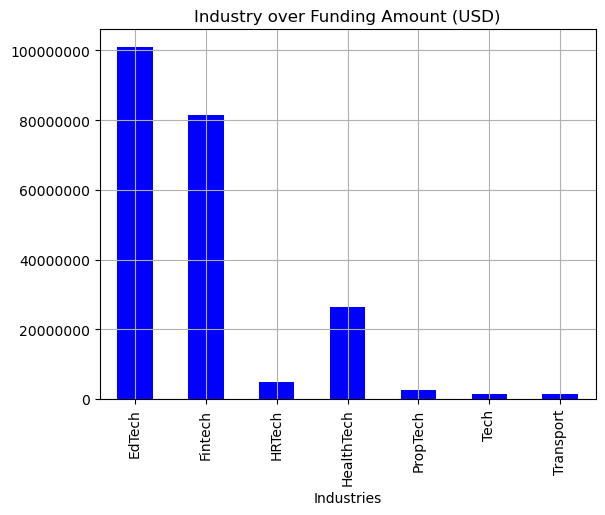

In [112]:
Total_fund_Indus = df.groupby('Industry')['Funding Amount (USD)'].sum()
Total_fund_Indus.plot(x= 'Industry', y= 'Funding Amount (USD)', kind='bar', color='blue')
plt.title('Industry over Funding Amount (USD)')
plt.xlabel('Industries')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Pie chart: showing distribution of funding Rounds?

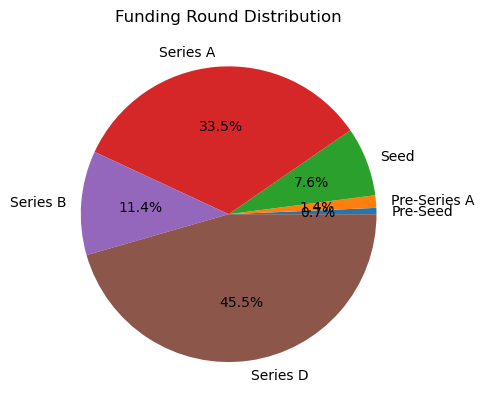

In [71]:
Funding_Rounds = df.groupby('Funding Round')['Funding Amount (USD)'].sum()
Funding_Rounds.plot(kind='pie', autopct='%1.1f%%', title='Funding Round Distribution')
plt.ylabel("")
plt.show()

Line plot: showing number of startups funded per year?

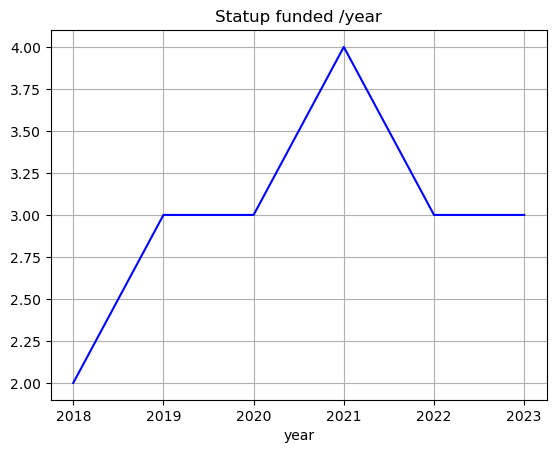

In [73]:
startup_year = new.groupby('Year')['Startup'].count()
startup_year.plot(x= 'Year', y= 'Startup', kind='line', color='blue')
plt.title('Statup funded /year')
plt.xlabel('year')
plt.grid(True)
plt.show()

**INSIGHTS/CONCLUSION**

- From the overall analysis, Edtech with a totol $101 million, dominates all other industry in **funding**
- From the overall analysis, funding in general, has decreased gradually over the years
- from the overall analysis, Lagos is leading city with the highest startup fundings   

in conclusion, investors should focus on the Edtech industry in places like lagos for prominent and promising startup and fundings  